## In this notebook, amplicon data will be imported as raw read counts and each ASV occurrence will be modeled as a probability distribution. Samples will then be clustered based on their overall community composition.

### Import all the dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import subprocess

### Move to working directory

In [2]:
os.chdir('/Users/nastassia.patin/GitHub/NOAA-NCAR-Hackathon')

### 01. This section imports the amplicon data as raw counts and calls an R script to model the ASV occurrence as a probability distribution. 

#### Import example amplicon data sheet and take a look

In [4]:
file = 'Data/Lasker2018_table_counts.tsv'
asvs = pd.read_csv(file, index_col=0, sep='\t')
asvs

,Flyer18Fc03_10_1,Flyer18Fc03_3_1,Flyer18Fc09_10_1,Flyer18Fc09_4_1,Flyer18Fc13_10_1,Flyer18Fc13_3_1,Lasker18Sc122_17,Lasker18Sc122_19,Lasker18Sc122_3,Lasker18Sc122_5,...,Lasker18Sc153_3,Lasker18Sc153_5,Lasker18Sc154_17,Lasker18Sc154_19,Lasker18Sc154_3,Lasker18Sc154_5,Lasker18Sc158_17,Lasker18Sc158_19,Lasker18Sc158_3,Lasker18Sc158_5
ASV ID,,,,,,,,,,,,,,,,,,,,,
a404bf4d32831f2133794e5fe5d0a73e,117,6319,4111,80,3916,151,514,452,5608,2089,...,3377,5228,232,283,5670,5001,78,49,5965,6185
f35c0a576bb1ab3577191cb12352c249,419,58,45,322,22,155,176,149,234,62,...,615,811,5053,7187,166,112,7859,7144,480,992
588253f8c914de60cbb9577946854a39,1975,1843,3545,2913,2398,5836,16700,14422,2638,1022,...,1156,1871,517,798,722,504,229,156,2527,2998
d883e3b29658c861ac524bbfc2cef34d,124,39,31,80,0,0,0,0,63,0,...,322,281,10969,13535,142,144,6950,6198,265,728
3468430277ce2317dec6f413dcfaa03e,1440,31,115,1258,29,434,480,367,97,41,...,266,345,2336,3027,81,49,2969,2279,325,507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5dc6c2efdb748cb3508b4e8592239b83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6f477eb9c90036177a1a870f0d4d5cc8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fd5567754d768cc191c36f6aaa99c51d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Call the R script to model the ASV count distributions

In [5]:
# Define command and arguments
path_to_rscript = '/Users/nastassia.patin/GitHub/NOAA-NCAR-Hackathon/ranRelPct_example.R'
number_of_samples = 87

In [24]:
def call_Rscript_for_amplicon_modeling(path, sample_num):
    # Use subprocess.Popen to open executable Rscript and extract stdout from 'print' command in R
    with subprocess.Popen(['Rscript', '--vanilla', path], 
                          stdout=subprocess.PIPE) as result:
        asvs_freq = result.stdout.read()
    
    # The R output gets imported as "bytes"; need to convert to string
    y = asvs_freq.decode("utf-8")
    y = y.replace(",", "").split()

    # remove the column and row headers
    z = [ x for x in y if "[" not in x ]

    # Convert to numpy array
    array = np.asarray(z)
    # Reshape to original dimensions; number of samples (columns) is second field, 
    # unknown number of ASVs can be supplied with '-1'
    mat = np.reshape(array, (-1, sample_num))

    # Covert to data frame with sample names as columns
    names = np.arange(1, sample_num+1, 1)
    df = pd.DataFrame(mat, columns=names)
    df = df.astype(float)
    return(df)

In [32]:
asvs_modeled = call_Rscript_for_amplicon_modeling(path_to_rscript, number_of_samples)

In [33]:
asvs_modeled

,1,2,3,4,5,6,7,8,9,10,...,78,79,80,81,82,83,84,85,86,87
0,0.001190,5.338112e-02,0.040928,1.100344e-03,4.294167e-02,4.302832e-03,0.000539,0.000390,0.003850,3.161572e-04,...,6.936105e-03,0.000003,0.007391,3.597579e-02,0.000714,0.000582,2.968913e-02,7.192233e-04,0.027801,0.000225
1,0.001010,2.608800e-02,0.000416,1.338798e-02,3.614141e-06,4.454579e-05,0.013828,0.000015,0.002667,6.622319e-03,...,5.869187e-04,0.000003,0.000004,1.394098e-05,0.000007,0.000003,1.374758e-02,6.627254e-04,0.001964,0.009516
2,0.001157,7.095181e-07,0.008495,5.879496e-03,9.465178e-06,6.355764e-03,0.000006,0.012433,0.008060,8.998963e-07,...,1.546372e-03,0.001568,0.002664,1.556766e-03,0.000568,0.000009,1.268308e-05,8.213086e-06,0.000018,0.000004
3,0.006097,7.463738e-03,0.000013,7.253778e-03,3.264725e-03,9.362493e-06,0.000026,0.001467,0.000004,1.516178e-05,...,5.447095e-07,0.002380,0.005937,4.180791e-06,0.000128,0.006731,1.211712e-04,1.896338e-07,0.007155,0.008304
4,0.000012,1.040205e-02,0.000650,2.688921e-03,1.110422e-03,1.033211e-03,0.001360,0.002074,0.000405,1.413840e-03,...,9.133422e-06,0.003645,0.002133,1.343079e-05,0.002166,0.001971,2.576432e-06,7.494329e-06,0.000564,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28737,0.000004,2.538014e-05,0.000032,9.144808e-06,2.997818e-05,1.203285e-07,0.000011,0.000002,0.000008,1.230649e-05,...,3.722640e-05,0.000002,0.000029,1.566551e-06,0.000008,0.000008,4.482614e-06,1.530916e-05,0.000030,0.000003
28738,0.000007,1.579204e-07,0.000004,6.308616e-06,4.559706e-07,5.252547e-06,0.000006,0.000010,0.000013,5.641145e-06,...,1.149264e-05,0.000026,0.000003,4.336047e-06,0.000003,0.000028,9.035621e-07,5.397286e-06,0.000001,0.000014
28739,0.000004,4.012504e-07,0.000002,3.168398e-06,2.361043e-06,1.266977e-06,0.000004,0.000013,0.000055,2.905254e-05,...,2.530693e-06,0.000016,0.000030,7.031538e-06,0.000006,0.000018,3.146042e-06,7.849771e-06,0.000016,0.000017
28740,0.000005,1.399276e-07,0.000006,1.037178e-05,2.829322e-05,5.452620e-07,0.000006,0.000009,0.000012,1.022718e-05,...,1.062530e-05,0.000005,0.000011,3.210074e-07,0.000004,0.000023,4.040842e-06,1.855510e-05,0.000005,0.000043


## 02. Use the modeled counts table generated in [01] to reduce dimensionality and visualize principal components

In [38]:
from sklearn.decomposition import PCA
import seaborn as sns

#### Log-transform data for Euclidean distances

In [34]:
df = np.log10(asvs_modeled)

#### From untransformed matrix

In [36]:
pca = PCA(n_components=10)
pca.fit_transform(asvs_modeled)
pca.explained_variance_ratio_.cumsum()

array([0.22959153, 0.31400098, 0.37732726, 0.43559479, 0.48323775,
       0.52685161, 0.5686654 , 0.60447624, 0.6388503 , 0.67100243])

#### From log-transformed matrix

In [37]:
pca = PCA(n_components=10)
pca.fit_transform(df)
pca.explained_variance_ratio_.cumsum()

array([0.07676284, 0.09616417, 0.11543973, 0.13046238, 0.14461422,
       0.15612519, 0.16734482, 0.17848609, 0.18953605, 0.20049175])

### We can see that log-transforming the data causes dimensionality reduction to explain even less of the variance than untransformed data. Moreover, even 10 components of the untransformed PCA don't explain most of the variance (max 67%). We'll have to work on this going forward.

<AxesSubplot:>

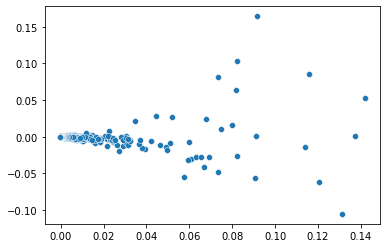

In [39]:
ca = PCA(n_components=2)
pcs = pca.fit_transform(asvs_modeled)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

## 03. Performing hierarchical clustering: default SciPy model

In [41]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

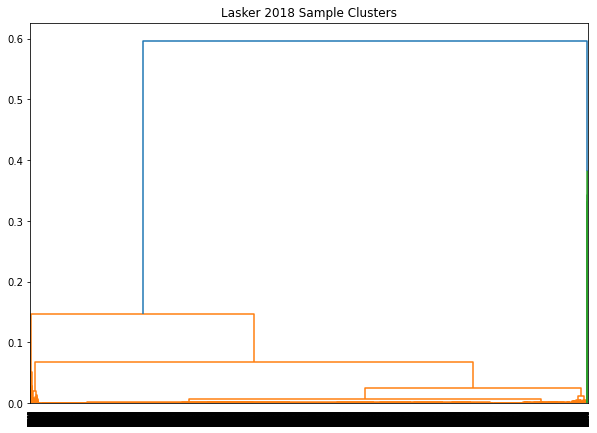

In [49]:
plt.figure(figsize=(10, 7))
plt.title("Lasker 2018 Sample Clusters")

# Make the clusters
clusters = shc.linkage(pcs, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

## 04. Performing hierarchical clustering: create an agglomerative hierarchical clustering model with Scikit-Learn

In [63]:
pcs_select = pd.DataFrame(pcs)
pcs_select = pcs_select.iloc[:, 0:2]
pcs_select = pcs_select.set_axis(['PC_1', 'PC_2'], axis=1, inplace=False)
pcs_select

,PC_1,PC_2
0,0.113934,-0.014639
1,0.039424,-0.017267
2,0.021542,-0.003215
3,0.023166,-0.004742
4,0.010211,-0.000943
...,...,...
28737,-0.000210,0.000030
28738,-0.000223,0.000029
28739,-0.000208,0.000022
28740,-0.000227,0.000027


In [43]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(pcs_select)
clustering_model.labels_

array([0, 1, 1, ..., 4, 4, 4])

Text(0.5, 1.0, 'Lasker 2018 16S Samples')

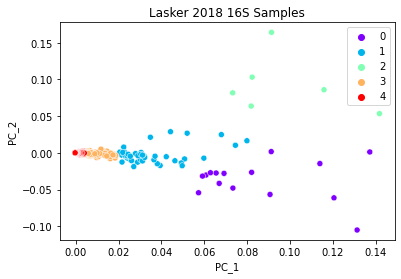

In [65]:
data_labels = clustering_model.labels_
sns.scatterplot(data=pcs_select, 
                x='PC_1',
                y='PC_2',
                hue=data_labels,
                palette="rainbow").set_title('Lasker 2018 16S Samples')

### EXTRA NOTE: Below is something I did for a k-means analysis once; it was a useful way of determining how many clusters are informative. Need to figure out how to do this with hierarchical clustering.

#### Determine how many clusters are most informative. Once the line starts to level out, more clusters become less useful.

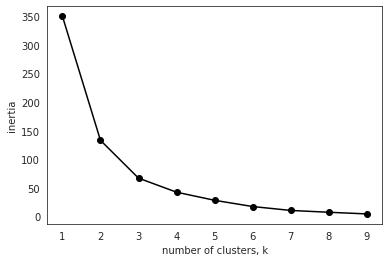

In [233]:
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()